In [10]:
import os
import sys
sys.path.append(r"/Users/nyu/Desktop/github/QuantumGRN")
import numpy as np
import pandas as pd

In [19]:
filename="/Users/nyu/Downloads/endo.csv"
df = pd.read_csv(filename)

In [20]:
df = df.rename(columns={df.columns[0]: 'genes'})
df.head(10)

,genes,1772158101_C01_A3,1772158101_C03_A1,1772158101_C04_A9,1772158101_C05_A8,1772158101_C07_B3,1772158101_C08_B2,1772158101_C09_B1,1772158101_C10_B9,1772158101_C11_B8,...,1782163197_C86_G5,1782163197_C87_G4,1782163197_C88_G12,1782163197_C90_G10,1782163197_C91_H6,1782163197_C92_H5,1782163197_C93_H4,1782163197_C94_H12,1782163197_C95_H11,1782163197_C96_H10
0,5_8S_rRNA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5S_rRNA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7SK,0,0,0,6,0,3,0,0,0,...,0,0,28,0,0,52,3,80,0,0
3,A1BG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A1BG-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A1CF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,A2M,0,0,1,0,0,0,0,0,0,...,67,0,0,0,5,0,148,762,0,1204
7,A2M-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,A2ML1-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
target_values = ["SPP1", "MMP1", "MMP3", "HGF", "LOX", "LIF"]

# Filter the DataFrame based on the values in the first cell
filtered_df = df[df.iloc[:, 0].isin(target_values)]

# Display the filtered DataFrame
print(filtered_df)

      genes  1772158101_C01_A3  1772158101_C03_A1  1772158101_C04_A9  \
15803   HGF                  0                  0                  0   
19129   LIF                  0                 52                 12   
20334   LOX                  0                  0                  0   
23056  MMP1                  0                  0                  0   
23078  MMP3                  0                  0                  0   
51064  SPP1                  0                  0                  0   

       1772158101_C05_A8  1772158101_C07_B3  1772158101_C08_B2  \
15803                  0                  0                  0   
19129                  0                231                  0   
20334                  0                 16                  0   
23056                  0                  0                  0   
23078                  0                  0                  0   
51064                  0                  0                  0   

       1772158101_C09_B1  177215

In [14]:
filtered_df.to_csv("endo_dataset.txt", sep='\t', index=False)

In [22]:
df = filtered_df 
print(df.shape)

(6, 2149)


In [7]:
import pandas as pd
from scipy.stats import zscore
# Extract the gene names

genes = df['genes']
df = df.drop(columns=['genes'])

# Check for columns with all zeros and drop them
df = df.loc[:, (df != 0).any()]

# Fill missing values with 0 before normalization
df.fillna(0, inplace=True)

# Perform z-score normalization
df_zscore = df.apply(zscore, axis=0)

# Calculate Pearson residuals
df_pearson_residual = df_zscore.apply(lambda x: (x - x.mean()) / x.std())

# Add the gene names back as a column
df_pearson_residual.insert(0, 'genes', genes)

# Save the preprocessed data to a new file
df_pearson_residual.to_csv("endo_pearsonresidual_9genes.txt", sep='\t', index=False)

In [8]:
df_pearson_residual.head()

,genes,1772158101_C01_A3,1772158101_C03_A1,1772158101_C04_A9,1772158101_C07_B3,1772158101_C09_B1,1772158101_C11_B8,1772158101_C16_C9,1772158101_C21_D1,1772158101_C23_D8,...,1782163197_C86_G5,1782163197_C87_G4,1782163197_C88_G12,1782163197_C90_G10,1782163197_C91_H6,1782163197_C92_H5,1782163197_C93_H4,1782163197_C94_H12,1782163197_C95_H11,1782163197_C96_H10
15803,HGF,-0.333333,-0.333333,-0.478068,-0.402963,-0.333333,-0.333333,-0.333333,-0.333333,-0.611719,...,-0.355438,-0.333333,-0.333333,-0.333333,-0.333333,-0.469453,-0.558747,-0.333333,-0.502762,-0.363645
16404,HOXA10,-0.333333,-0.333333,-0.478068,-0.402963,-0.333333,-0.333333,-0.333333,-0.333333,-0.611719,...,-0.371119,-0.333333,-0.333333,-0.333333,-0.333333,-0.469453,-0.545319,-0.333333,-0.502762,-0.363645
16910,IGFBP3,2.666667,-0.333333,2.305974,-0.033702,-0.333333,-0.333333,-0.333333,-0.333333,-0.611719,...,-0.088860,-0.333333,-0.333333,-0.333333,-0.333333,2.370353,1.374860,2.666667,1.897041,-0.363645
17381,IL15,-0.333333,-0.333333,-0.478068,-0.402963,-0.333333,-0.333333,-0.333333,-0.333333,1.136800,...,-0.355438,-0.333333,-0.333333,-0.333333,-0.333333,-0.469453,-0.095487,-0.333333,-0.502762,-0.363645
19129,LIF,-0.333333,2.666667,1.040501,2.643434,2.666667,2.666667,2.666667,2.666667,0.475198,...,-0.371119,-0.333333,-0.333333,-0.333333,2.666667,-0.469453,-0.558747,-0.333333,-0.502762,2.657408


In [9]:
final = df_pearson_residual

In [10]:
# training qsgrn
from qscgrn import *
final = final.set_index('genes').T
ncells, ngenes = final.shape
final = qsc_order_gene(final)
genes = final.columns.to_list()
p_obs = qsc_distribution(final)
activation = qsc_activation_ratios(final)

2024-05-27 00:53:40 | I | The dataframe genes are ordered
2024-05-27 00:53:40 | I | The observed probability `p_obs` is calculated
2024-05-27 00:53:40 | I | Activation ratios are computed


In [11]:
theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)
qgrn = model(ncells, genes, theta, edges, p_obs)
qgrn.train()

2024-05-27 00:53:42 | I | Theta series is initialized using zeros as method with activation values
2024-05-27 00:53:42 | I | Edges for the QuantumGRN and quantum circuit are created for 6 genes
2024-05-27 00:53:42 | I | The QuantumGRN model is been initialized with 6 genes and 1184 cells
2024-05-27 00:53:42 | I | Starting the optimization for the QuantumGRN
1000/1000 [==================================================] - 212s 212ms/step
2024-05-27 00:57:14 | I | Optimization completed!!.. Due to the number of epochs reached


In [12]:
print(genes)

['LIF', 'SPP1', 'LOX', 'HGF', 'MMP3', 'MMP1']


In [13]:
draw_network(genes, edges, qgrn.theta, filename="qgrn_endo_network.png")

2024-05-27 00:57:50 | I | Drawing the network representation of the qscGRN model and exporting to qgrn_endo_network.png file.


2024-05-27 00:58:00 | I | Plotting the Observed distribution in a barplot and exporting to p_obs.svg file.


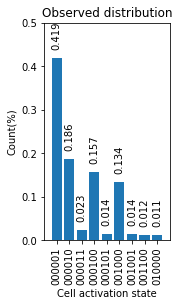

In [14]:
mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.5,
                 title="Observed distribution",
                 filename="p_obs.svg")

In [15]:
p_init = qgrn.output_probabilities(drop_zero=True).reshape(2**ngenes,)

2024-05-27 00:58:09 | I | Plotting the Comparison of distributions in a barplot and exporting to comparison_obs_init.svg file.


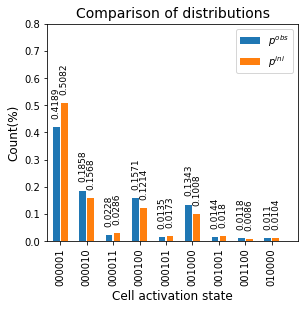

In [16]:
comparison_hist(ngenes, p_obs, p_init, limit=0.01, ymax=0.8, mask=mask,
                filename="comparison_obs_init.svg", tags=["p^{obs}", "p^{ini}"])

In [17]:
p_out = qgrn.p_out.reshape(2**ngenes,)

2024-05-27 00:58:15 | I | Plotting the Comparison of distributions in a barplot and exporting to comparison_obs_out.svg file.


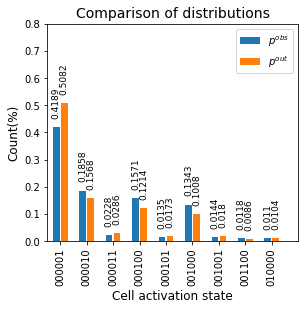

In [18]:
comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.8, mask=mask,
                filename="comparison_obs_out.svg")

In [19]:
p_qiskit = qgrn.run_qiskit(filename="circuit_qscgrn.svg")

2024-05-27 00:58:23 | I | Drawing the quantum circuit of the qscGRN model and saving to circuit_qscgrn.svg


2024-05-27 00:58:27 | I | Plotting the Comparison of distributions in a barplot and exporting to comparison_obs_qiskit.svg file.


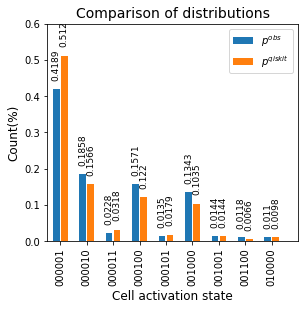

In [20]:
comparison_hist(ngenes, p_obs, p_qiskit, limit=0.01, ymax=0.6, mask=mask,
                filename="comparison_obs_qiskit.svg", tags=["p^{obs}", "p^{qiskit}"])

In [22]:
import matplotlib as mpt
import matplotlib.pyplot as plt

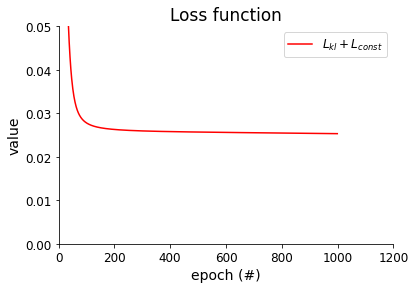

In [23]:
plt.figure()
plt.plot(qgrn.loss, 'r', label='$L_{kl} + L_{const}$')

plt.title("Loss function", fontsize=17)
plt.xlabel("epoch (#)", fontsize=14)
plt.ylabel("value", fontsize=14)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200], fontsize=12)
plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05], fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=12)
plt.xlim([0, 1200])
plt.ylim([0, 0.05])

plt.savefig("loss_function.svg", transparent=True, bbox_inches="tight", facecolor ='w', dpi=700)